<a href="https://colab.research.google.com/github/chandrusuresh/Hands-On-ML/blob/master/Ch10-IntroToANN/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
print('Tensor flow version:',tf.__version__)
print('TF Keras version:',keras.__version__)

Tensor flow version: 2.3.0
TF Keras version: 2.4.0


## Fashion MNIST
Fashion MNIST is a drop-in replacement for MNIST and has the same format as MNIST with 70000 grayscale images of size 28x28 pixes each with 10 total classes.The images represent fashion items, so each class is more diverse than the original MNIST and is significantly more challenging than MNIST.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

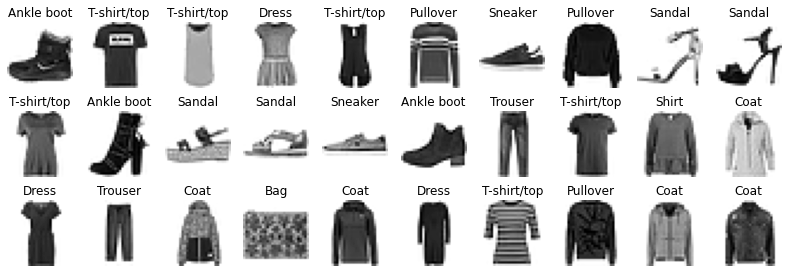

In [3]:
img_size = X_train_full.shape[1]
fig,ax = plt.subplots(3,10,figsize=(10,10))
plt.subplots_adjust(bottom=0.7,top=1.05, right=1.2)
for i in range(3):
  for j in range(10):
    ax[i][j].imshow(1-X_train_full[i*10+j,:,:].reshape(img_size,img_size)/255.0,cmap='gray')
    ax[i][j].axis('off')
    ax[i][j].set_title(class_names[y_train_full[i*10+j]])

In [4]:
print('Training data size:',X_train_full.shape)
print('Training data type:',X_train_full.dtype)

Training data size: (60000, 28, 28)
Training data type: uint8


In [5]:
X_valid,X_train = X_train_full[:5000,:,:]/255.0,X_train_full[5000:,:,:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

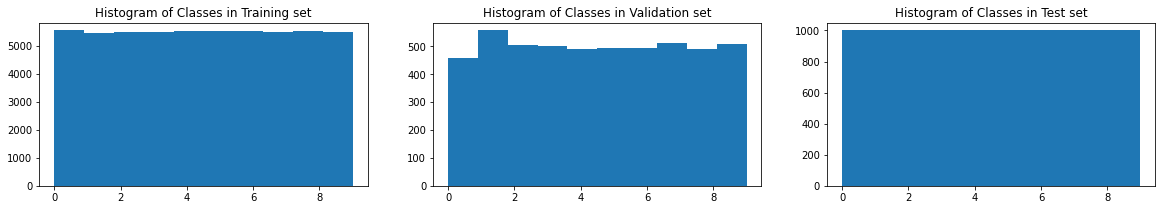

In [6]:
fig,ax = plt.subplots(1,3,figsize=(20,3))
ax[0].hist(y_train);ax[0].set_title('Histogram of Classes in Training set');
ax[1].hist(y_valid);ax[1].set_title('Histogram of Classes in Validation set');
ax[2].hist(y_test);ax[2].set_title('Histogram of Classes in Test set');

## Creating a Sequential Model

In [7]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation=keras.activations.relu))
model.add(keras.layers.Dense(100,activation=keras.activations.relu))
model.add(keras.layers.Dense(10,activation=keras.activations.softmax))

### Model summary and info

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('Layer Names')
for i,l in enumerate(model.layers):
  print(i,l.name)

Layer Names
0 flatten
1 dense
2 dense_1
3 dense_2


### Layer parameters
The weights and biases of a layer can be accessed by the `get_weights()` and `set_weights()` functions. The weights are set randomly while the biases is set to zero by default. Alternatively, an appropriate distribution for initializing weights can be chosen by setting the `kernel_initializer` and `bias_initializer` attributes when declaring the layer in the model above. More info on layer initializers can be found [here](https://keras.io/api/layers/initializers/).

In [10]:
weights,biases = model.layers[1].get_weights()
print('Shape of weights:',weights.shape)
print('Shape of biases:',biases.shape)

Shape of weights: (784, 300)
Shape of biases: (300,)


### Model Compile
After a model is created, it must be compiled by specifying the loss functions and the optimizer to use. We can also optionally specify a list of other metrics to compute during training and evaluation.

In [11]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=keras.metrics.sparse_categorical_accuracy)

We use `sparse_categorical_crossentropy` because we have sparse labels  and the classes are exclusive (only one out of 10 classes is the label). In the case we have one-hot vectors instead of soft-max, we'll use `categorical_crossentropy`.

The learning rate for the optimizer can be set in the optimizer. The default value of $\eta = 0.01$.

### Training and Evaluation

In [12]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7065 - sparse_categorical_accuracy: 0.7694 - val_loss: 0.5064 - val_sparse_categorical_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4861 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.4389 - val_sparse_categorical_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4397 - sparse_categorical_accuracy: 0.8464 - val_loss: 0.4024 - val_sparse_categorical_accuracy: 0.8650
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4125 - sparse_categorical_accuracy: 0.8563 - val_loss: 0.3925 - val_sparse_categorical_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3922 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.3932 - val_sparse_categorical_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3768 - spars

Index(['loss', 'sparse_categorical_accuracy', 'val_loss',
       'val_sparse_categorical_accuracy'],
      dtype='object')


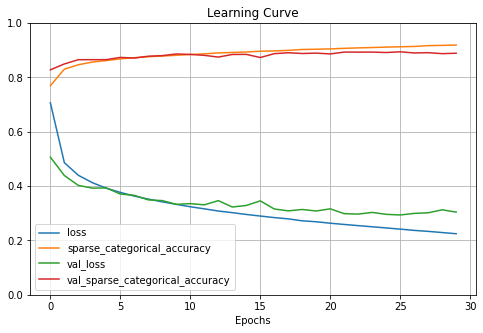

In [23]:
import pandas as pd
df = pd.DataFrame(history.history)
print(df.columns)
df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1);
plt.gca().set_title('Learning Curve')
plt.gca().set_xlabel('Epochs');

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 61.4654 - sparse_categorical_accuracy: 0.8538


[61.465431213378906, 0.8537999987602234]